# Homework 5: Inference using bayesian networks
We are going to code an exact inference and approximate inference method for bayesian networks. Below is code that will be useful for you to. Please take the time to understand it.

## Turn in your jupyter notebook and a .pdf of your notebook

In [7]:
import random
import pandas as pd
import numpy as np


T = True
F = False

class CPT(pd.DataFrame):
    '''Conditional Probability Table class. Inherits from pandas dataframes'''
    def __init__(self, name, probs:list, values:list=[T,F], parents:tuple=()):
        index = values
        if len(parents)!= 0:
            pvalues = []
            names = []
            for parent in parents:
                pvalues += [parent.values]
                names += [parent.__name__]
            '''Multi-indexes make some algorithms easier to implement'''
            index = pd.MultiIndex.from_product(pvalues+[values], names=names+[name])
        super().__init__(probs, index=index, columns=['Probability'])        


        
class Node(object):
    "A discrete random variable; conditional on zero or more parent Variables."
    def __init__(self, name:str, values:list, parents:tuple=(), probs:list=[]):
        "A node has a name, tuple of parent variables, and values it can take."
        self.__name__ = name
        self.name = name
        self.parents  = parents
        self.parentNames = [parent.__name__ for parent in parents]
        self.values   = values
        if len(probs) != 0:
            self.cpt = CPT(name, probs, values, parents)
            self.checkProbs()
            
    def checkProbs(self):
        '''Ensures that rows add up to 1'''
        if len(self.parentNames) != 0: 
            groupedDf = self.cpt.groupby(self.parentNames)
            for _, values in groupedDf.groups.items():
                probsum = 0
                for item in values:
                    probsum += self.cpt.loc[item].Probability
                if probsum != 1:
                    raise ValueError('Sum of Entries does not equal 1 for parent entry', _)
        else:
            if self.cpt['Probability'].sum() != 1:
                raise ValueError('Sum of Entries does not equal 1')

    ''' Representation function that returns the name of the node'''
    def __repr__(self): return self.__name__
    

def P(variable, evidence:dict={}):
    '''Helper function for probability calculations.'''
    
    '''Make a copy of evidence so we do not overwrite the variable'''
    ev = evidence.copy()
    '''Ensure evidence only contains parents'''
    for var in evidence.keys():
        if var not in variable.parentNames and var != variable.name:
            del ev[var]
    '''Return a CPT, if there is no evidence (orphan node)'''
    if len(ev) == 0:
        return variable.cpt
    '''If we have a value for an orphan node, return the respective probability'''
    if len(variable.parentNames) == 0 and variable.name in ev.keys():
        return variable.cpt.Probability[ev[variable.name]]
    '''Iterate over parent names'''
    subKeys = [variable.name] + variable.parentNames
    if all(key in ev for key in subKeys):
        if variable.name in ev:
            grpd = variable.cpt.groupby(list(ev.keys())).get_group(tuple(ev.values()))
            return grpd.Probability.values
    '''Pandas group by is weird... You need a tuple for multiple keys, but a single value for a single key'''
    if len(ev) == 1:
        return variable.cpt.groupby(list(ev.keys())).get_group(tuple(ev.values())[0])
    return variable.cpt.groupby(list(ev.keys())).get_group(tuple(ev.values()))

## Example Usage
Below is code to create a node, view a CPT, and various examples for getting different probabilities

In [16]:
''' Create earthquake orphan node'''
E = Node("Earthquake", values=[T, F], parents=(), probs=[0.5, 0.5])
display(E)
'''Get probability of earthquake being true. Notice the dictionary notation: key is Node.name, not just a node'''
display(P(E, {E.name:T}))

'''Create two more nodes that have parents'''
B = Node("Bicycle", values=[T, F], parents=(), probs=[0.4, 0.6])

C = Node("Car", values=['red', 'blue','green'], parents=(E,B), probs=[0.3,0.2,0.5,
                                                                      0.3,0.2,0.5,
                                                                      0.3,0.2,0.5,
                                                                      0.3,0.2,0.5])

'''Ways to get various CPTs and probabilities'''
display(P(C))
display(P(C, evidence={C.name:'red'}))

display(P(C, evidence={E.name:T}))

display(P(C, evidence={E.name:T, B.name:F}))

display(P(C, evidence={E.name:T, B.name:F, C.name:'red'}))

Earthquake

0.5

Probability
Earthquake Bicycle Car               
True       True    red            0.3
                   blue           0.2
                   green          0.5
           False   red            0.3
                   blue           0.2
                   green          0.5
False      True    red            0.3
                   blue           0.2
                   green          0.5
           False   red            0.3
                   blue           0.2
                   green          0.5

Probability
Earthquake Bicycle Car             
True       True    red          0.3
           False   red          0.3
False      True    red          0.3
           False   red          0.3

Probability
Earthquake Bicycle Car               
True       True    red            0.3
                   blue           0.2
                   green          0.5
           False   red            0.3
                   blue           0.2
                   green          0.5

Probability
Earthquake Bicycle Car               
True       False   red            0.3
                   blue           0.2
                   green          0.5

array([0.3])

# Question 1: Bayesian Network Exact Inference
Now we are going to implement exact inference in a bayesian network class. Fill in the normalize function, and the enumeration ask, enumerate all class method functions. See the function outlines below. You can also go to this website for help: http://courses.csail.mit.edu/6.034s/handouts/spring12/bayesnets-pseudocode.pdf


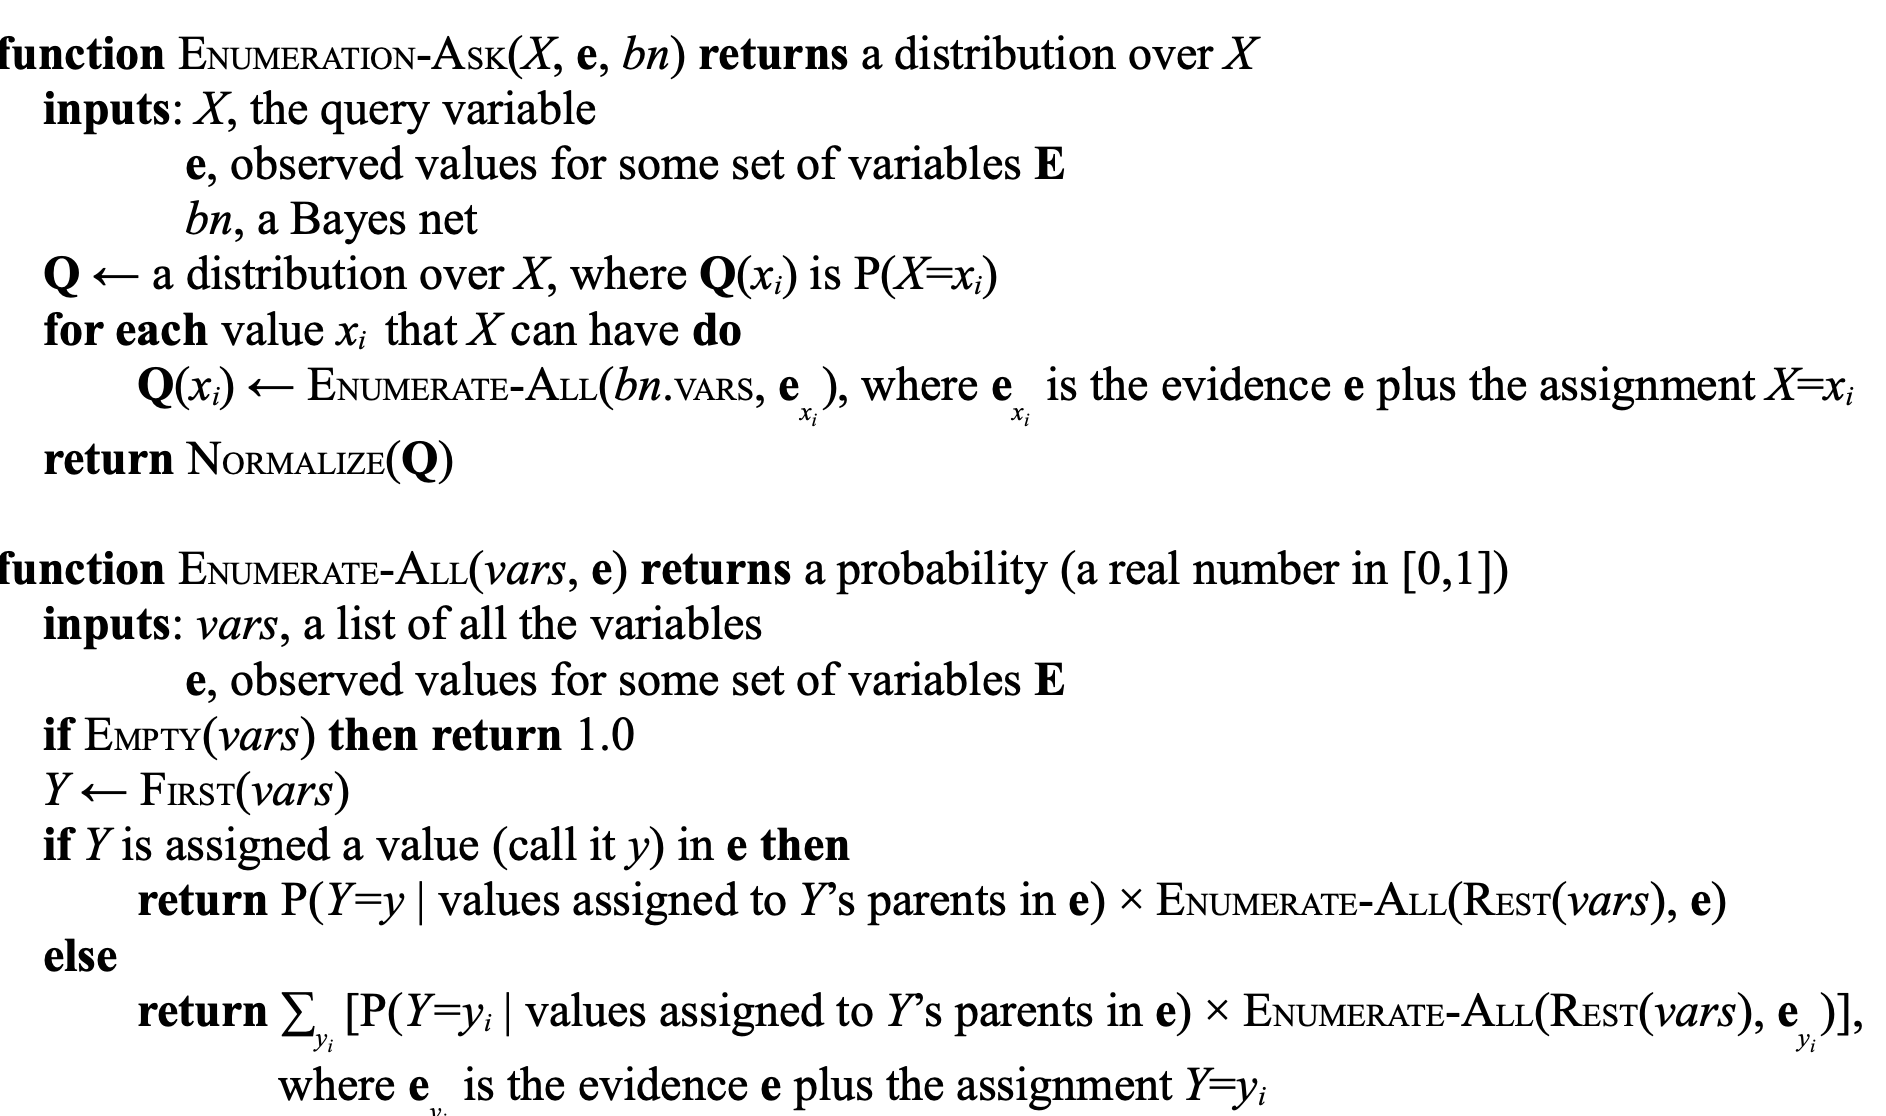



In [12]:
from copy import deepcopy
from pickle import APPEND


def normalize(probs:dict):
    '''Takes in a dictionary of value, probability key-value pairs'''
    '''Your code here'''
    normalizer=sum(probs.values())
    for p in probs:
        probs[p] = probs[p]/normalizer
    return probs


class BayesNet(object):
    "Bayesian network: a graph of variables connected by parent links."
     
    def __init__(self): 
        self.nodes = []
        ''' Your code here'''
        
            
    def add(self, *node:Node):
        "Add a new Variable to the BayesNet"
        for item in node:
            self.nodes.append(item)
        
    def enumerationAsk(self, query:Node, evidence:dict):
        '''Exact Inference Calculation, query is a Node, evidence is a dict ({Node.name:value})'''
        nodes = self.nodes.copy()
        Q = {}
        '''Your code here'''
        e = deepcopy(evidence)
        for xi in query:
            e[query] = xi
            Q[xi] = self.enumerateAll(self.nodes, e)
        Q = normalize(Q)
        '''Stop coding here'''
        return Q

    def enumerateAll(self, nodes, e):
        '''Your code here'''
        EE = deepcopy(e)
        eyi = deepcopy(e)
        if len(nodes) == 0:
            return 1.0
        Y, rest = nodes[0], nodes[1:]
        for yi in nodes:
            eyi[nodes] = yi
        if Y in EE:
            return P(EE[Y], EE) * self.enumerateAll(rest, EE)
        else:
            for y in Y:
                beep = sum(P(y, EE) * self.enumerateAll(rest, eyi))
            return beep
        

        

        
        

# Testing your Exact Inference
Now, we are going to test our exact inference with the bayesian network from the homework (below).
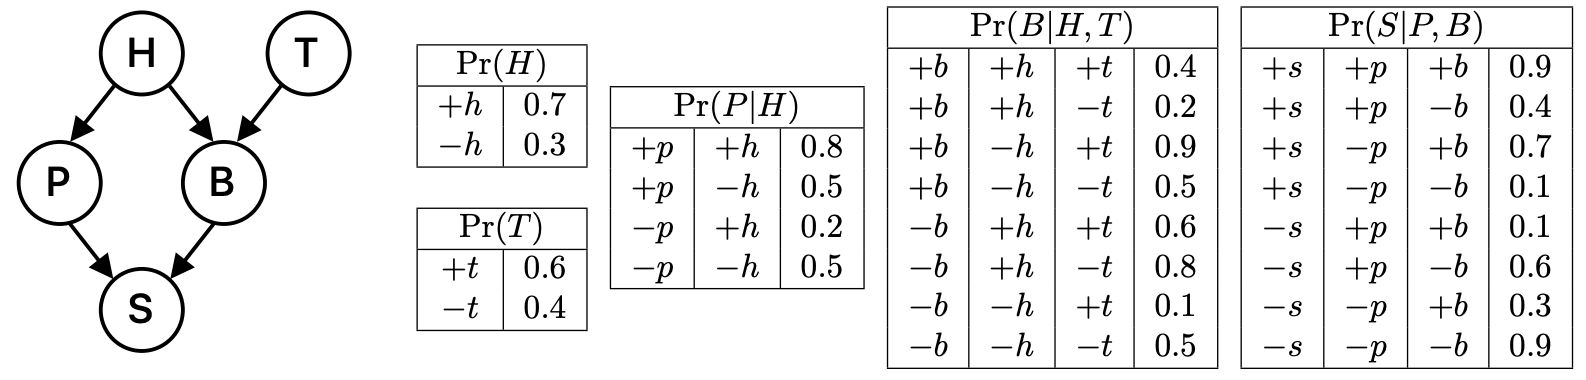

Test your method for P(S|+b,+h), which should returm <0.86, 0.14>

In [22]:
'''Create the nodes and associated cpts'''
'''Your code here'''
Th = Node("Tee", values = [T, F], parents=(), probs=[0.6, 0.4])
H  = Node("Aytch", values=[T, F], parents=(), probs=[0.7, 0.3])
Pi = Node("Pie", values=[T, F], parents = (H), probs=[0.8,0.5,0.2,0.5])
B  = Node("Bee", values=[T, F], parents = (H,Th), probs=[0.4,0.2,0.9,0.5,0.6,0.8,0.1,0.5])
S  = Node("Sess", values=[T, F], parents = (Pi,B), probs=[0.9,0.4,0.7,0.1,0.1,0.6,0.3,0.9])

TypeError: 'Node' object is not iterable

In [23]:
'''Create the bayesian network, add the nodes to the network, and run your enumeration ask function'''
'''This has been implemented for you'''
hwNet = BayesNet()
hwNet.add(Th, H, Pi, B, S)
hwNet.enumerationAsk(query=S, evidence={B.name:T, H.name:T})

NameError: name 'Pi' is not defined

# Approximate Inference
Now, we are going to code and test some approximate inference methods. A base Sampler class has been implemented for you.

In [ ]:
import random

class Sampler(object):
    "A sampling object that inherits methods from your bayesian network object"""
    
    def __init__(self, BayesNet): 
        self.net = BayesNet
        ''' Your code here'''
        
    def sampleNode(self, node:Node, evidence:dict = {}):
        value = random.random()
        cpt = P(node, evidence)
        total = 0
        for prob in cpt.Probability.values:
            if value < prob + total:
                if len(node.parentNames) > 0:
                    return cpt.loc[cpt.Probability == prob].index.get_level_values(node.name)[0]
                else:
                    return cpt.loc[cpt.Probability==prob].index[0]
            total += prob
        return value
    
    def sample(self):
        pass
        
samp = Sampler(hwNet)
print(samp.sampleNode(Th))
print('---')
print(samp.sampleNode(Pi, {H.name:T, Th.name:F}))   

## Question 2: Approximate Inference
Fill in the methods for the Prior and Rejection sampling classes below.

In [ ]:
    
class PriorSampler(Sampler):
    
    def __init__(self, BayesNet):
        super().__init__(BayesNet)
        '''Your Code Here'''
    
    def sample(self, n=1, evidence:dict={}):
        self.samples = pd.DataFrame()
        ''' Your code here'''
        
        '''stop coding here'''
        return self.samples
        
    
    def calcProb(self, query:Node, evidence:dict={}):
        '''Check if any evidence, if not: return value_counts of query name'''
        if len(evidence) == 0:
            return self.samples[query.name].value_counts(normalize=True)
        
        '''Groupby evidence'''
        grpdDf = self.samples.groupby(list(evidence.keys()))
        
        '''set ev to a single value or a list of values in order to work with get_group'''
        if len(evidence) == 1:
            ev = list(evidence.values())[0]
        else:
            ev = tuple(evidence.values())
            
        '''Try/Catch structure to deal with evidence values not in the sample space'''
        try:
            return grpdDf.get_group(ev)[query.name].value_counts(normalize=True)
        except KeyError:
            print('No samples match the evidence values')
            return None
            

In [ ]:
'''Code to test your functions for 5 samples'''
prior = PriorSampler(hwNet)
display(prior.sample(n=5))
display(prior.calcProb(query=S))
display(prior.calcProb(query=S, evidence={B.name:T}))
display(prior.calcProb(query=S, evidence={B.name:T, H.name:T}))

## Prove that your Prior Sampling method is consistent
In the cells below, prove that prior sampling converges to the actual probabilities for the hw net problem.

In [ ]:
'''Your code here'''


## Rejection Sampling
Now we are going to code a rejection sampler below.

In [ ]:
class RejectionSampler(Sampler):
    
    def __init__(self, BayesNet):
        super().__init__(BayesNet)
        '''Your Code Here'''
    
    def sample(self, n=1, evidence:dict={}):
        self.samples = pd.DataFrame()
        ''' Your code here'''
        
        '''stop coding here'''
        return self.samples
        
    
    def calcProb(self, query:Node, evidence:dict={}):
        try:
            return self.samples[query.name].value_counts(normalize=True)
        except:
            print('No samples exist in line with evidence')
            return None

In [ ]:
'''Test your code here'''
reject = RejectionSampler(hwNet)
temp = reject.sample(n=5, evidence={B.name:T, H.name:T})
display(temp)
display(reject.calcProb(query=S, evidence={B.name:T, H.name:T}))   

## Prove rejection sampling is consistent
Similiar to prior sampling, prove that your rejection sampling method is consistent. Additionally, determine the average number of samples rejected when N=100.

# Exact inference time vs Sampling
Now, we are going to see the timing difference between exact inference and sampling.

In [ ]:
'''Create bayes network and add the initial node'''
timingNet = BayesNet()
timingNet.add(Node('s_0',values=[T, F], parents=(), probs=[0.8, 0.2]))
'''Add 5 more nodes to the network'''
for i in range(5):
    timingNet.add(Node('s_' + str(i+1), values=[T,F], parents=(timingNet.nodes[-1],), probs=[0.8,0.2, 
                                                                                            0.2, 0.8]))
print(len(timingNet.nodes))

In [ ]:
import time
'''Get start time'''
start = time.time()
'''Run Exact Inference'''
display(timingNet.enumerationAsk(query=timingNet.nodes[0],evidence={timingNet.nodes[-1].name:F}))
print('Exact inference time:', time.time() - start)

'''Run prior sampling with 1000 samples'''
start = time.time()
prior = PriorSampler(timingNet)
temp = prior.sample(n=1000)
display(prior.calcProb(query=timingNet.nodes[0], evidence={timingNet.nodes[-1].name:F}))
print('Approximate inference time:', time.time() - start)


## Question 3:
You should see that exact inference took less time than approximate inference. However, there is a cross-over point where approximate inference is significantly faster. Your job is to generate a plot of number of nodes and inference time (x-axis and y-axis, respectively) and determine the order of growths and the cross-over point. Look into matplotlib for plotting functions.

In [ ]:
import matplotlib.pyplot as plt
'''Your code here'''

# Extra Credit: Likelihood Sampling
Similiar to both rejection and prior sampling, code a likelihood sampling method and prove it is consistent. Create a plot showing the time it takes for exact inference, prior sampling, and likelihood sampling for 500 samples.

In [ ]:
class LikelihoodSampler(Sampler):
    
    def __init__(self, BayesNet):
        super().__init__(BayesNet)
        '''Your Code Here'''
    
    def sample(self, n=1, evidence:dict={}):
        ''' Your code here'''
        pass
        
    
    def calcProb(self, query:Node, evidence:dict={}):
        '''Your code here'''
        pass